## Contenido

### 1. Introducción
### 2. Señales, descripción en el tiempo y en frecuencia
### 3. Filtros pasa bajas
### 5. Filtros pasa altas
### 6. Probando FFT sobre datos adquiridos (micrófono)

Exploraremos el concepto de filtrado de señales utilizando Python. l filtrado de señales es una técnica crucial en ingeniería mecánica para procesar y analizar datos provenientes de sensores.

filtrado de señales implica la manipulación del contenido frecuencial de una señal para eliminar ruido no deseado y resaltar información importante. En ingeniería mecánica, esto puede ser útil al trabajar con datos provenientes de acelerómetros, medidores de presión, termopares u otros dispositivos.

In [1]:
#importar librerias
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.fft import fft

def formato_grafica(titulo, ejex, ejey, leyenda=False, xlim=[None, None], ylim=[None, None]):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
    
    if leyenda == True:
        plt.legend(loc='best')
    
    plt.tight_layout;

### 2. Señales, descripción en el tiempo y en frecuencia

Primero observemos una señal en el tiempo. Para esto proponemos una función en el tiempo que represente lo que podría ser la vibración medida sobre una máquina rotativa.

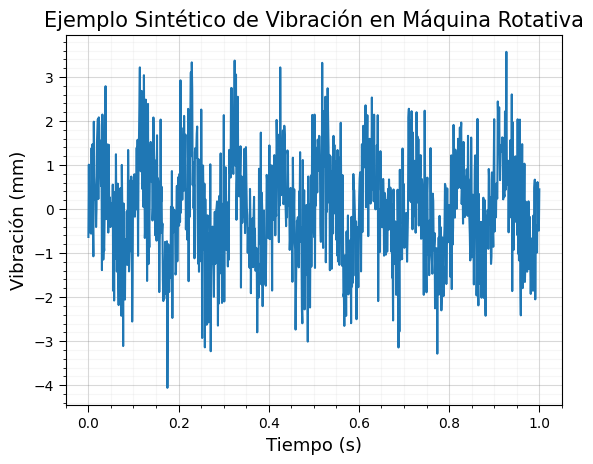

In [2]:
#Generamos datos sintéticos
t = np.linspace(0, 1, 1000)  # Tiempo
vibracion = np.sin(2 * np.pi * 10 * t) + 1.0 * np.random.randn(1000)  # Vibración simulada
plt.plot(t,vibracion)
formato_grafica('Ejemplo Sintético de Vibración en Máquina Rotativa', 'Tiempo (s)', 'Vibración (mm)')

 Podemos representar casi cualquier señal compleja combinando adecuadamente estas simples ondas sinusoidales con diferentes frecuencias, amplitudes y fases.
Este es el objetivo de la transformada de fourier, que permite  tomar nuestra señal compleja original y descomponerla para encontrar exactamente cuáles son esas ondas sinusoidales constituyentes, incluyendo su frecuencia y amplitud.
 Cuando aplicamos la Transformada de Fourier a una función $f(t)$ donde $t$ representa el tiempo o el espacio, obtenemos otra función $\hat{f}(\omega)$ donde $\omega$ representa las frecuencias. La magnitud |$\hat{f}(\omega)$| nos dice cuánto contribuye cada frecuencia a la composición global de nuestra señal original.

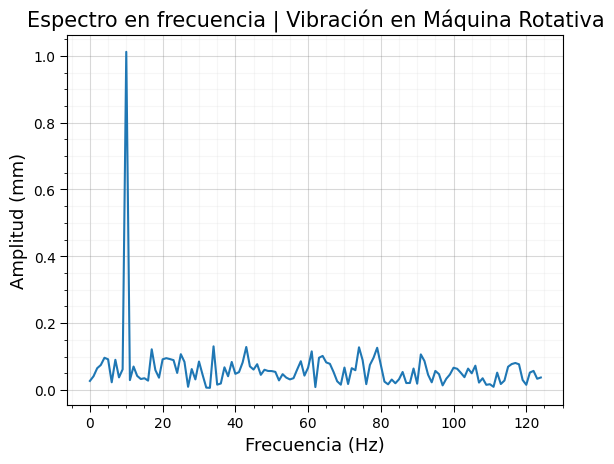

In [3]:
# Encontrar el espectro en frecuencia de la grabación
spectrum = np.abs(fft(vibracion))
    
# Crear el eje de frecuencias
freqs = np.fft.fftfreq(len(spectrum), 1/1000)

# Actualizar la visualización en tiempo real
plt.clf()
plt.plot(freqs[:len(freqs)//8], spectrum[:len(spectrum)//8]*2/1000)
formato_grafica('Espectro en frecuencia | Vibración en Máquina Rotativa', 'Frecuencia (Hz)', 'Amplitud (mm)')

#Podemos observar que la señal se descompone en una onda seno prominente con frecuencia de 10Hz y otras ondas de varias frecuencias y menores magnitudes.

### 3. Filtros pasa bajas

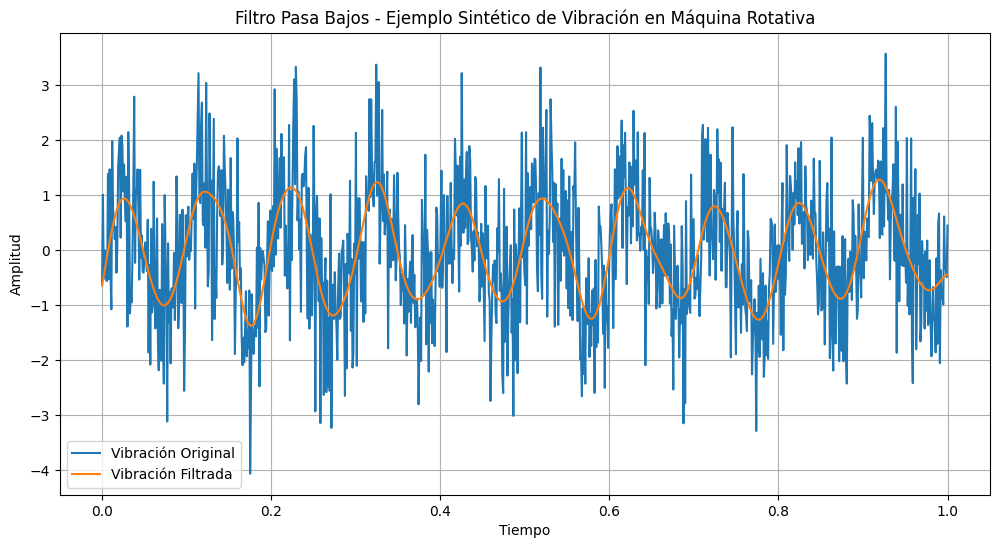

In [4]:
# Filtro pasa bajas
cutoff_freq = 20   # Frecuencia límite (Hz)
b, a = signal.butter(4, cutoff_freq / (0.5*1000), 'low')
vibracion_filtrada = signal.filtfilt(b, a, vibracion)

plt.figure(figsize=(12, 6))
plt.plot(t, vibracion, label='Vibración Original')
plt.plot(t, vibracion_filtrada, label='Vibración Filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtro Pasa Bajos - Ejemplo Sintético de Vibración en Máquina Rotativa')
plt.legend()
plt.grid(True)
plt.show()

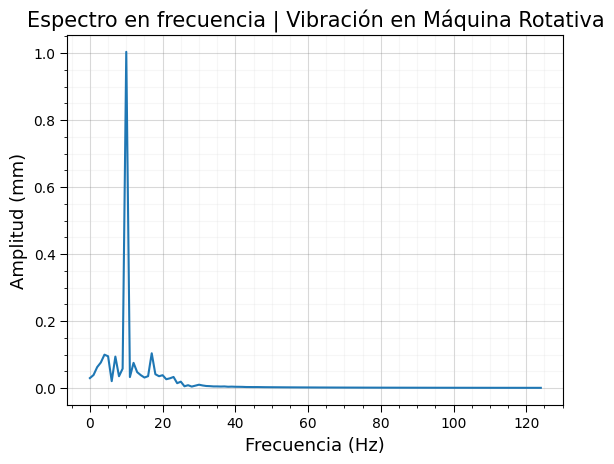

In [5]:
# Encontrar el espectro en frecuencia de la grabación
spectrum = np.abs(fft(vibracion_filtrada))
    
# Crear el eje de frecuencias
freqs = np.fft.fftfreq(len(spectrum), 1/1000)

# Actualizar la visualización en tiempo real
plt.clf()
plt.plot(freqs[:len(freqs)//8], spectrum[:len(spectrum)//8]*2/1000)
formato_grafica('Espectro en frecuencia | Vibración en Máquina Rotativa', 'Frecuencia (Hz)', 'Amplitud (mm)')

### 4. Filtros pasa altas

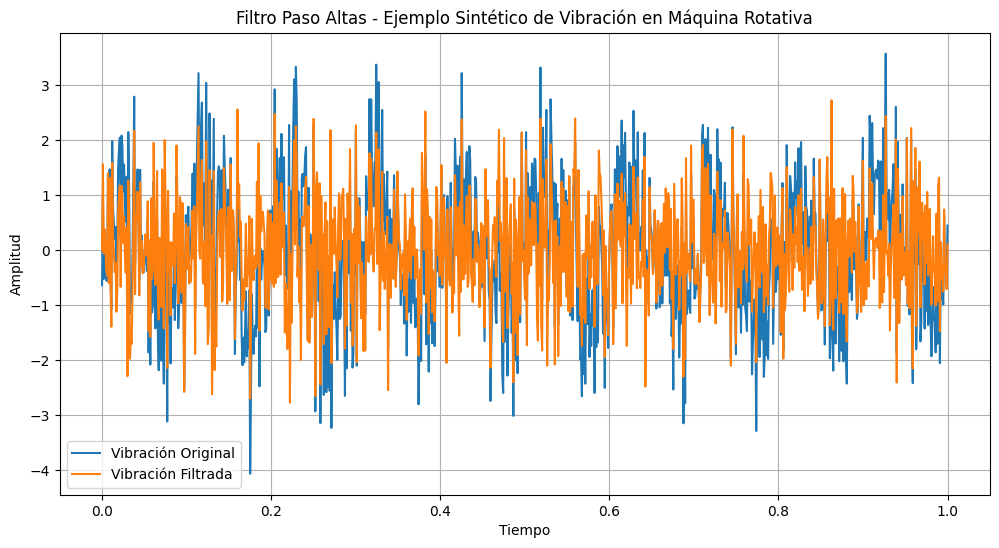

In [6]:
cutoff_freq_hp = 20   # Frecuencia límite (Hz)
b, a = signal.butter(4, cutoff_freq_hp / (0.5*1000), 'high')
vibracion_filtrada = signal.filtfilt(b, a, vibracion)


plt.figure(figsize=(12, 6))
plt.plot(t, vibracion, label='Vibración Original')
plt.plot(t, vibracion_filtrada, label='Vibración Filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtro Paso Altas - Ejemplo Sintético de Vibración en Máquina Rotativa')
plt.legend()
plt.grid(True)
plt.show()

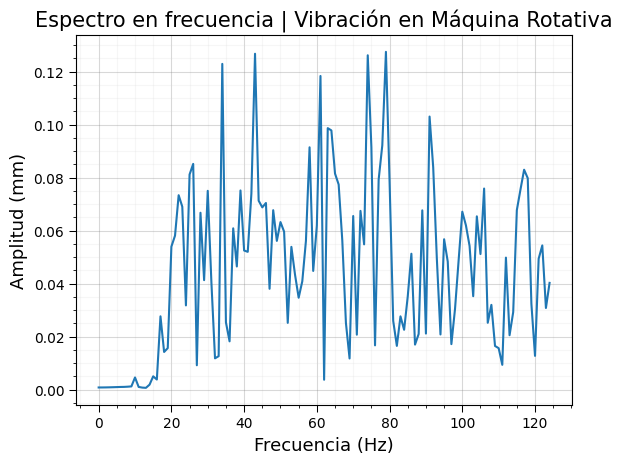

In [7]:
# Encontrar el espectro en frecuencia de la grabación
spectrum = np.abs(fft(vibracion_filtrada))
    
# Crear el eje de frecuencias
freqs = np.fft.fftfreq(len(spectrum), 1/1000)

# Actualizar la visualización en tiempo real
plt.clf()
plt.plot(freqs[:len(freqs)//8], spectrum[:len(spectrum)//8]*2/1000)
formato_grafica('Espectro en frecuencia | Vibración en Máquina Rotativa', 'Frecuencia (Hz)', 'Amplitud (mm)')

 ### 6. Probando FFT sobre datos adquiridos (micrófono)

Configure el micrófono para capturar datos durante 5 segundos con una frecuencia de muestreo de 44100 Hz y un solo canal.

In [9]:
# Creamos una clase para grabar del micrófono
class recorder():    
    fs = 44100  # Frecuencia de muestreo (Hz)
    duration = 5  # Duración de la grabación (segundos)

    def record(self):
        print('Grabando...')
        self.data=[]
        with sd.InputStream(callback=self.callback, channels=1, samplerate=recorder.fs):
            sd.sleep(recorder.duration * 1000)
        print('Grabación finalizada')
    
    def callback(self,indata, frames, time, status):
        if status:
            print(status)
        self.data = np.concatenate([self.data,indata[:, 0]])   



Grabando...
Grabación finalizada


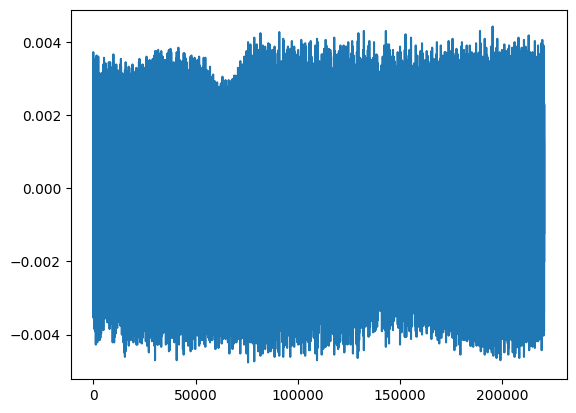

In [13]:
#Probemos el grabador de audio
r=recorder()
r.record()
plt.plot(r.data)

Text(0, 0.5, 'Amplitud')

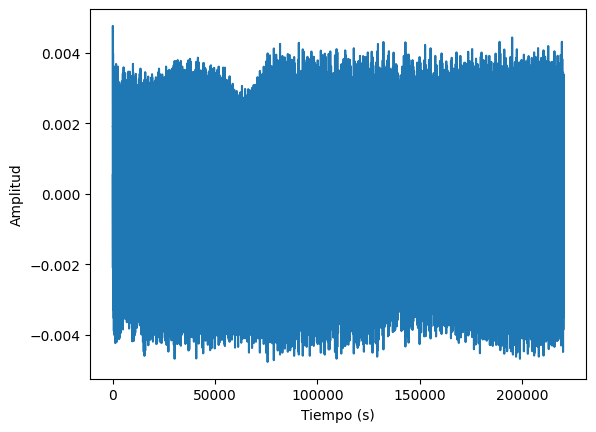

In [14]:
# Probemos reproducir el sonido que grabamos

#Eliminamos las bajas frecuencias
cutoff_freq_hp = 30   # Frecuencia límite (Hz)
b, a = signal.butter(4, cutoff_freq_hp , 'high',fs=44000)
data = signal.filtfilt(b, a, r.data)

sd.play(data, samplerate=44000)
sd.wait()

tt=np.arange(0,len(data))/44000
plt.plot(data)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

Text(0.5, 1.0, 'FFT del sonido registrado con el micrófono')

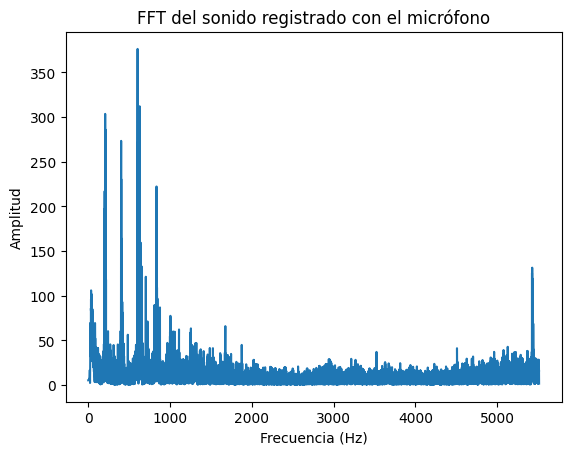

In [50]:
# Encontrar el espectro en frecuencia de la grabación
spectrum = np.abs(fft(data))
    
# Crear el eje de frecuencias
freqs = np.fft.fftfreq(len(spectrum), 1/fs)

# Actualizar la visualización en tiempo real
plt.clf()
plt.plot(freqs[:len(freqs)//8], spectrum[:len(spectrum)//8])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('FFT del sonido registrado con el micrófono')